<a href="https://colab.research.google.com/github/Hamza-Faarooq/Neural_Network_Pruning_with_SNNs/blob/main/Basic_SNN_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SNN FROM SCRATCH USING NUMPY**

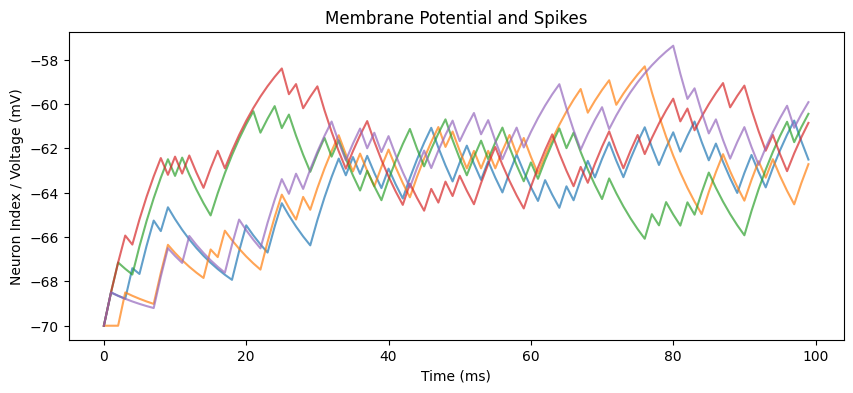

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_neurons = 5
num_timesteps = 100
V_rest = -70  # Resting potential (mV)
V_threshold = -55  # Spike threshold (mV)
tau_m = 10  # Membrane time constant (ms)
dt = 1  # Time step (ms)

# Input: Random spikes (0 or 1)
X = np.random.randint(0, 2, (num_neurons, num_timesteps))

# Initialize membrane potentials
V = np.ones((num_neurons, num_timesteps)) * V_rest
spikes = np.zeros((num_neurons, num_timesteps))

# Simulation
for t in range(1, num_timesteps):
    # Update membrane potential
    dV = (V_rest - V[:, t-1]) + X[:, t] * (V_threshold - V_rest)
    V[:, t] = V[:, t-1] + (dV / tau_m) * dt

    # Check for spikes
    spiked = V[:, t] >= V_threshold
    spikes[spiked, t] = 1
    V[spiked, t] = V_rest  # Reset after spike

# Plot
plt.figure(figsize=(10, 4))
plt.title("Membrane Potential and Spikes")
plt.plot(V.T, alpha=0.7)
plt.eventplot([np.where(spikes[i])[0] for i in range(num_neurons)], colors='k', lineoffsets=range(num_neurons))
plt.xlabel("Time (ms)")
plt.ylabel("Neuron Index / Voltage (mV)")
plt.show()


# **SNN USING EXISITING FRAMEWORKS: SNNTORCH**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 8.4 MB/s eta 0:00:00


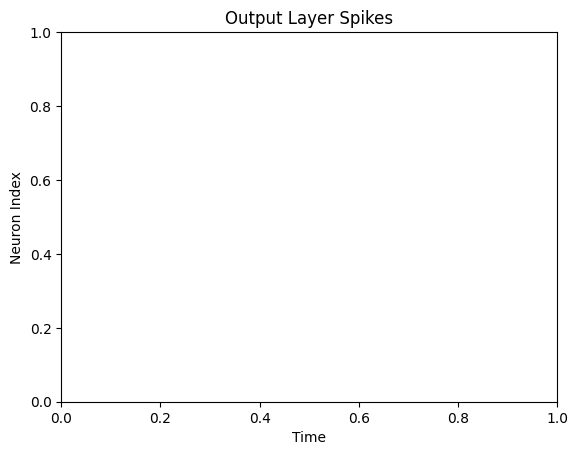

In [2]:
# Install snnTorch first
!pip install snntorch

import snntorch as snn
import torch
import matplotlib.pyplot as plt

# Parameters
num_steps = 50  # Simulation timesteps
beta = 0.9  # Decay rate (leaky)

# Input: Random spikes (batch_size=1, input_size=10)
# Stronger and more biased inputs
spike_data = torch.randn((num_steps, 1, 10)) * 2 + 1.5  # Mean shifted to 1.5

# Define a 3-layer SNN
net = torch.nn.Sequential(
    torch.nn.Linear(10, 128),
    snn.Leaky(beta=beta, init_hidden=True),  # LIF neuron layer 1
    torch.nn.Linear(128, 64),
    snn.Leaky(beta=beta, init_hidden=True),  # LIF neuron layer 2
    torch.nn.Linear(64, 2),
    snn.Leaky(beta=beta, init_hidden=True, output=True)  # Output layer
)

# Simulate
mem_rec = []  # Membrane potential recordings
spk_rec = []  # Spike recordings

for step in range(num_steps):
    spk, mem = net(spike_data[step])
    spk_rec.append(spk)
    mem_rec.append(mem)

# Plot spikes
plt.figure()
plt.title("Output Layer Spikes")
plt.xlabel("Time")
plt.ylabel("Neuron Index")
plt.eventplot([torch.where(spk_rec[i][0])[0].numpy() for i in range(num_steps)], colors='k')
plt.show()


In [3]:
!pip install snntorch torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [4]:
!pip install --upgrade snntorch

In [5]:
from snntorch import spikegen

import torch
import torchvision
import torchvision.transforms as transforms
# Import from snntorch.functional for spike generation
from snntorch import functional as snn_func
from snntorch import spikegen # This imports the spikegen submodule

# Download and transform MNIST
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

# Example: Get one batch and encode as Poisson spike trains
data, targets = next(iter(trainloader))
num_steps = 25
# Call the poisson function from the imported spikegen submodule
spike_data = spikegen.rate(data, num_steps=25)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.49MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 60.8kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 245kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.74MB/s]


In [6]:
import snntorch as snn
import torch.nn as nn
import torch.optim as optim

# SNN Model
class SNNNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.lif1 = snn.Leaky(beta=0.95)
        self.fc2 = nn.Linear(128, 10)
        self.lif2 = snn.Leaky(beta=0.95, output=True)

    def forward(self, x):
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()
        spk2_sum = 0
        for step in range(x.size(0)):
            cur = x[step].view(x.size(1), -1)
            cur = self.fc1(cur)
            spk1, mem1 = self.lif1(cur, mem1)
            cur = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur, mem2)
            spk2_sum += spk2
        return spk2_sum

net = SNNNet()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = net.to(device)


# **PRE-PRUNING**

In [7]:
import snntorch as snn
import torch
import torch.nn as nn
import torch.optim as optim
from snntorch import spikegen
import torchvision.transforms as transforms
import torchvision

# Download and transform MNIST
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

# Define the SNN model
class SNNNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.lif1 = snn.Leaky(beta=0.95)
        self.fc2 = nn.Linear(128, 10)
        self.lif2 = snn.Leaky(beta=0.95, output=True)

    def forward(self, x):
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()
        spk2_sum = 0

        for step in range(x.size(0)):
            cur = x[step].view(x[step].size(0), -1)
            cur = self.fc1(cur)
            spk1, mem1 = self.lif1(cur, mem1)
            cur = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur, mem2)
            spk2_sum += spk2

        return spk2_sum

# Set up device and model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = SNNNet().to(device)

# Training settings
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3)
num_steps = 25

# Training loop
for batch_idx, (data, targets) in enumerate(trainloader):
    data = data.to(device)
    targets = targets.to(device)

    spike_data = spikegen.rate(data, num_steps=num_steps)

    mem1 = net.lif1.init_leaky()
    mem2 = net.lif2.init_leaky()
    spk_rec = []

    for step in range(num_steps):
        spk, mem1 = net.lif1(net.fc1(spike_data[step].view(spike_data[step].size(0), -1)), mem1)
        spk, mem2 = net.lif2(net.fc2(spk), mem2)
        spk_rec.append(spk)

    spk_tensor = torch.stack(spk_rec)
    out = spk_tensor.sum(dim=0)  # shape: [batch, 10]

    # Loss
    loss = criterion(out, targets)

    # Accuracy calculation
    preds = out.argmax(dim=1)
    acc = (preds == targets).float().mean()

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch_idx % 100 == 0:
        print(f"Batch {batch_idx}, Loss: {loss.item():.4f}, Accuracy: {acc.item()*100:.2f}%")

    # Optional: stop early for testing
    # if batch_idx == 500:
    #     break


Batch 0, Loss: 2.8598, Accuracy: 3.91%
Batch 100, Loss: 0.3358, Accuracy: 90.62%
Batch 200, Loss: 0.1806, Accuracy: 95.31%
Batch 300, Loss: 0.1421, Accuracy: 96.88%
Batch 400, Loss: 0.2205, Accuracy: 92.19%


# **PRUNING**

In [24]:
import torch.nn.utils.prune as prune

# Prune 30% of the weights in the first fully connected layer
prune.l1_unstructured(net.fc1, name='weight', amount=0.45)

# To see the pruning mask
print(net.fc1.weight_mask)


tensor([[1., 0., 0.,  ..., 0., 1., 1.],
        [1., 0., 1.,  ..., 1., 0., 0.],
        [0., 1., 1.,  ..., 1., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 1., 0.,  ..., 1., 1., 0.],
        [0., 1., 0.,  ..., 1., 0., 1.]], device='cuda:0')


# **AFTER PRUNING**

In [25]:
import snntorch as snn
import torch
import torch.nn as nn
import torch.optim as optim
from snntorch import spikegen
import torchvision.transforms as transforms
import torchvision

# Download and transform MNIST
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

# Define the SNN model
class SNNNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.lif1 = snn.Leaky(beta=0.95)
        self.fc2 = nn.Linear(128, 10)
        self.lif2 = snn.Leaky(beta=0.95, output=True)

    def forward(self, x):
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()
        spk2_sum = 0

        for step in range(x.size(0)):
            cur = x[step].view(x[step].size(0), -1)
            cur = self.fc1(cur)
            spk1, mem1 = self.lif1(cur, mem1)
            cur = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur, mem2)
            spk2_sum += spk2

        return spk2_sum

# Set up device and model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = SNNNet().to(device)

# Training settings
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3)
num_steps = 25

# Training loop
for batch_idx, (data, targets) in enumerate(trainloader):
    data = data.to(device)
    targets = targets.to(device)

    spike_data = spikegen.rate(data, num_steps=num_steps)

    mem1 = net.lif1.init_leaky()
    mem2 = net.lif2.init_leaky()
    spk_rec = []

    for step in range(num_steps):
        spk, mem1 = net.lif1(net.fc1(spike_data[step].view(spike_data[step].size(0), -1)), mem1)
        spk, mem2 = net.lif2(net.fc2(spk), mem2)
        spk_rec.append(spk)

    spk_tensor = torch.stack(spk_rec)
    out = spk_tensor.sum(dim=0)  # shape: [batch, 10]

    # Loss
    loss = criterion(out, targets)

    # Accuracy calculation
    preds = out.argmax(dim=1)
    acc = (preds == targets).float().mean()

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch_idx % 100 == 0:
        print(f"Batch {batch_idx}, Loss: {loss.item():.4f}, Accuracy: {acc.item()*100:.2f}%")

    # Optional: stop early for testing
    # if batch_idx == 500:
    #     break


Batch 0, Loss: 2.7411, Accuracy: 9.38%
Batch 100, Loss: 0.2446, Accuracy: 92.97%
Batch 200, Loss: 0.2390, Accuracy: 92.97%
Batch 300, Loss: 0.1912, Accuracy: 96.09%
Batch 400, Loss: 0.1691, Accuracy: 94.53%


In [26]:
import matplotlib.pyplot as plt

# Initialize lists to record metrics
loss_list = []
acc_list = []

# Add this inside your training loop:
# (Just before the "if batch_idx % 100 == 0" line)



# Accuracy calculation
predictions = out.argmax(1)
correct = (predictions == targets).sum().item()
accuracy = 100 * correct / targets.size(0)

# Append to tracking lists
loss_list.append(loss.item())
acc_list.append(accuracy)

# Optional debug print
print(f"Batch {batch_idx}: Loss={loss.item():.4f}, Accuracy={accuracy:.2f}%")


# Print
if batch_idx % 100 == 0:
    print(f"Batch {batch_idx}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")

Batch 468: Loss=0.2268, Accuracy=95.83%


In [27]:
# Test Evaluation
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

net.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, targets in testloader:
        data = data.to(device)
        targets = targets.to(device)

        # Convert to spike train
        spike_data = spikegen.rate(data, num_steps=num_steps)

        # Forward through network
        out = net(spike_data)
        preds = out.argmax(1)

        correct += (preds == targets).sum().item()
        total += targets.size(0)

test_accuracy = 100 * correct / total
print(f"\nTest Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 95.55%


In [30]:
def magnitude_prune(model, prune_percent=0.45):
    for name, param in model.named_parameters():
        if 'weight' in name:
            # Flatten weights and compute threshold
            tensor = param.data.abs().clone()
            threshold = torch.quantile(tensor, prune_percent)
            mask = tensor > threshold

            # Apply mask
            param.data *= mask

            print(f"Pruned {name}: kept {mask.sum().item()} / {param.numel()}")

# Example: prune 20% smallest weights
magnitude_prune(net, prune_percent=0.45)

# Now check sparsity
print_sparsity(net)


Pruned fc1.weight: kept 55194 / 100352
Pruned fc2.weight: kept 704 / 1280
fc1.weight: 45.00% sparse (45158/100352 zeros)
fc2.weight: 45.00% sparse (576/1280 zeros)


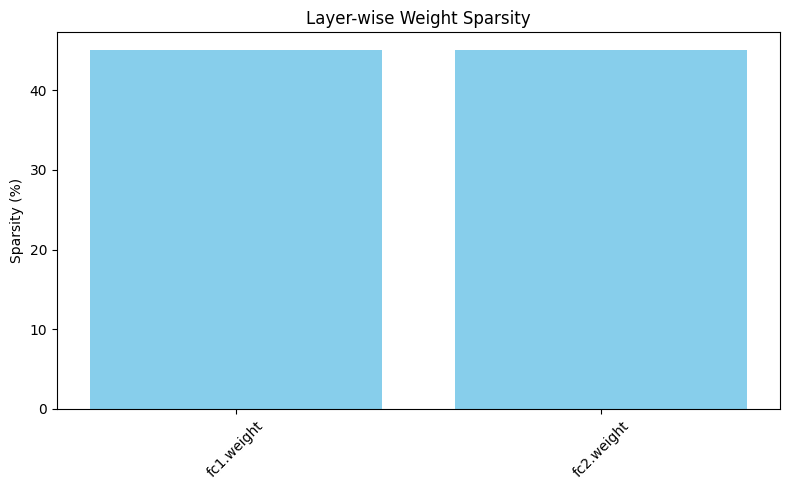

In [31]:
# Plot sparsity per layer
layer_names = []
sparsities = []

for name, param in net.named_parameters():
    if 'weight' in name:
        total_params = param.numel()
        zero_params = torch.sum(param == 0).item()
        sparsity = 100 * zero_params / total_params
        layer_names.append(name)
        sparsities.append(sparsity)

plt.figure(figsize=(8, 5))
plt.bar(layer_names, sparsities, color='skyblue')
plt.ylabel('Sparsity (%)')
plt.title('Layer-wise Weight Sparsity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
import torch.nn.utils.prune as prune

# Apply global unstructured pruning to both layers
parameters_to_prune = (
    (net.fc1, 'weight'),
    (net.fc2, 'weight'),
)

prune.global_unstructured(
    parameters_to_prune,
    pruning_method=prune.L1Unstructured,
    amount=0.5,  # Prune 50% of weights globally
)

# Check sparsity
def check_sparsity(model):
    for name, module in model.named_modules():
        if isinstance(module, nn.Linear):
            weight = module.weight
            if hasattr(weight, 'mask'):
                nonzero = torch.sum(module.weight_mask != 0).item()
                total = module.weight_mask.nelement()
                sparsity = 100 * (1 - nonzero / total)
                print(f"{name}.weight: {sparsity:.2f}% sparse ({total - nonzero}/{total} zeros)")
            else:
                print(f"{name}.weight: 0.00% sparse (0/{module.weight.nelement()} zeros)")

check_sparsity(net)

fc1.weight: 0.00% sparse (0/100352 zeros)
fc2.weight: 0.00% sparse (0/1280 zeros)


In [23]:
import snntorch as snn
import torch
import torch.nn as nn
import torch.optim as optim
from snntorch import spikegen
import torchvision.transforms as transforms
import torchvision

# Download and transform MNIST
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

# Define the SNN model
class SNNNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.lif1 = snn.Leaky(beta=0.95)
        self.fc2 = nn.Linear(128, 10)
        self.lif2 = snn.Leaky(beta=0.95, output=True)

    def forward(self, x):
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()
        spk2_sum = 0

        for step in range(x.size(0)):
            cur = x[step].view(x[step].size(0), -1)
            cur = self.fc1(cur)
            spk1, mem1 = self.lif1(cur, mem1)
            cur = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur, mem2)
            spk2_sum += spk2

        return spk2_sum

# Set up device and model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = SNNNet().to(device)

# Training settings
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3)
num_steps = 25

# Training loop
for batch_idx, (data, targets) in enumerate(trainloader):
    data = data.to(device)
    targets = targets.to(device)

    spike_data = spikegen.rate(data, num_steps=num_steps)

    mem1 = net.lif1.init_leaky()
    mem2 = net.lif2.init_leaky()
    spk_rec = []

    for step in range(num_steps):
        spk, mem1 = net.lif1(net.fc1(spike_data[step].view(spike_data[step].size(0), -1)), mem1)
        spk, mem2 = net.lif2(net.fc2(spk), mem2)
        spk_rec.append(spk)

    spk_tensor = torch.stack(spk_rec)
    out = spk_tensor.sum(dim=0)  # shape: [batch, 10]

    # Loss
    loss = criterion(out, targets)

    # Accuracy calculation
    preds = out.argmax(dim=1)
    acc = (preds == targets).float().mean()

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch_idx % 100 == 0:
        print(f"Batch {batch_idx}, Loss: {loss.item():.4f}, Accuracy: {acc.item()*100:.2f}%")

    # Optional: stop early for testing
    # if batch_idx == 500:
    #     break

Batch 0, Loss: 3.2622, Accuracy: 12.50%
Batch 100, Loss: 0.2578, Accuracy: 92.19%
Batch 200, Loss: 0.1964, Accuracy: 95.31%
Batch 300, Loss: 0.1115, Accuracy: 95.31%
Batch 400, Loss: 0.1386, Accuracy: 94.53%
